In [149]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [150]:
column_names = ["Price","Brand", "Rating", "Model", "Rating_Count", "Rating_Score", "Face_Recognition", "Screen_Size","Charge_Type",
                     "Storage", "Ram", "Battery", "Warranty", "Camera_Resolution_Back", "Camera_Resolution_Front"]

df = pd.read_csv(r"C:\Users\OMN\Desktop\Veriseti\Telefon_veriseti_son2.csv", encoding='utf-8', names=column_names)
df

,Price,Brand,Rating,Model,Rating_Count,Rating_Score,Face_Recognition,Screen_Size,Charge_Type,Storage,Ram,Battery,Warranty,Camera_Resolution_Back,Camera_Resolution_Front
0,Price,Brand,Rating,Model,Rating Count,Rating Score,Face Recognition,Screen Size,Charge Type,Storage,Ram,Battery,Warranty,Camera Resolution Back,Camera Resolution Front
1,"50009,00",Apple,4.8,Apple iPhone 15 128 GB,3488,4.8,Var,"['6,1', 'inç']",Lightning,128 GB,6 GB RAM,3877 mAh,24,20 MP ve Üzeri,12 MP
2,"24399,00",Apple,4.8,Apple iPhone 11 128 GB,29192,4.8,Var,"['6,1', 'inç']",Lightning,128 GB,4 GB RAM,3110 mAh,24,"8 - 12,9 MP",12 MP
3,"38699,00",Apple,4.8,Apple iPhone 13 128 GB,19231,4.8,Var,"['6,1', 'inç']",Lightning,128 GB,4 GB RAM,3095 mAh,24,"8 - 12,9 MP",12 MP
4,"6898,99",POCO,4.6,POCO Poco C65 256 GB 8 GB Ram (Poco Türkiye Ga...,816,4.6,Var,"['6,74', 'inç']",Type-C,256 GB,8 GB RAM,5000 mAh,24,20 MP ve Üzeri,8.0 MP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,"16499,00",Xiaomi,4.7,Xiaomi Redmi Note 13 Pro 512GB 12GB (Xiaomi Tü...,1244,4.7,Var,"['6,67', 'inç']",NaN,512 GB,12 GB RAM,5000 mAh,24,20 MP ve Üzeri,16 MP
937,"18718,00",Samsung,4.8,Samsung Galaxy A55 256 GB 8 GB Ram (Samsung Tü...,402,4.8,Yok,"['6,6', 'inç']",NaN,256 GB,8 GB RAM,5000 mAh,24,"8 - 12,9 MP",32 MP
938,"16235,00",Samsung,4.7,Samsung Galaxy A55 128 GB 8 GB Ram (Samsung Tü...,270,4.7,Yok,"['6,6', 'inç']",NaN,128 GB,8 GB RAM,5000 mAh,24,"8 - 12,9 MP",32 MP
939,"30399,00",Apple,4.8,Apple iPhone 12 128 GB,5133,4.8,Var,"['6,1', 'inç']",Lightning,128 GB,4 GB RAM,2815 mAh,24,"8 - 12,9 MP",12 MP


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Price                    760 non-null    object
 1   Brand                    934 non-null    object
 2   Rating                   838 non-null    object
 3   Model                    934 non-null    object
 4   Rating_Count             838 non-null    object
 5   Rating_Score             838 non-null    object
 6   Face_Recognition         752 non-null    object
 7   Screen_Size              755 non-null    object
 8   Charge_Type              430 non-null    object
 9   Storage                  754 non-null    object
 10  Ram                      754 non-null    object
 11  Battery                  754 non-null    object
 12  Warranty                 752 non-null    object
 13  Camera_Resolution_Back   753 non-null    object
 14  Camera_Resolution_Front  758 non-null    o

In [152]:
df.Ram.loc[3:50]

3      4 GB RAM
4      8 GB RAM
5      8 GB RAM
6      8 GB RAM
7      8 GB RAM
8      8 GB RAM
9      8 GB RAM
10    12 GB RAM
11     8 GB RAM
12     8 GB RAM
13     4 GB RAM
14    12 GB RAM
15     6 GB RAM
16     6 GB RAM
17     8 GB RAM
18     8 GB RAM
19     6 GB RAM
20     8 GB RAM
21     6 GB RAM
22    12 GB RAM
23          NaN
24     8 GB RAM
25    12 GB RAM
26     8 GB RAM
27     8 GB RAM
28     4 GB RAM
29     4 GB RAM
30     8 GB RAM
31     8 GB RAM
32     8 GB RAM
33    12 GB RAM
34     6 GB RAM
35          Yok
36    12 GB RAM
37     4 GB RAM
38     6 GB RAM
39          Yok
40     8 GB RAM
41     4 GB RAM
42     8 GB RAM
43    12 GB RAM
44     6 GB RAM
45     6 GB RAM
46         4 GB
47     8 GB RAM
48     8 GB RAM
49     8 GB RAM
50     8 GB RAM
Name: Ram, dtype: object

In [153]:
df.columns = df.columns.str.strip()
df.columns

Index(['Price', 'Brand', 'Rating', 'Model', 'Rating_Count', 'Rating_Score',
       'Face_Recognition', 'Screen_Size', 'Charge_Type', 'Storage', 'Ram',
       'Battery', 'Warranty', 'Camera_Resolution_Back',
       'Camera_Resolution_Front'],
      dtype='object')

In [154]:
df = df.dropna(subset=['Price'])
df['Price'] = df['Price'].str.split(',').str[0]
df['Price']

C:\Users\OMN\AppData\Local\Temp\ipykernel_44572\3193514238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.split(',').str[0]


0      Price
1      50009
2      24399
3      38699
4       6898
       ...  
936    16499
937    18718
938    16235
939    30399
940    16798
Name: Price, Length: 760, dtype: object

In [155]:
#df['Screen Size'] = df['Screen Size'].str.replace("inç" ,".")
#df['Screen Size'] = df['Screen Size'].str.replace("." ,"")
df['Screen_Size'] = df['Screen_Size'].str.split(', ').str[0]
df['Screen_Size'] = df['Screen_Size'].str.split(']').str[0]
df['Screen_Size'] = df['Screen_Size'].str.replace("[","")
df['Screen_Size'] = df['Screen_Size'].str.replace("'","")
#df['Screen Size'] = df['Screen Size'].str.split(',').str[2] 
df['Screen_Size']



C:\Users\OMN\AppData\Local\Temp\ipykernel_44572\2902529210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen_Size'] = df['Screen_Size'].str.split(', ').str[0]
C:\Users\OMN\AppData\Local\Temp\ipykernel_44572\2902529210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen_Size'] = df['Screen_Size'].str.split(']').str[0]
C:\Users\OMN\AppData\Local\Temp\ipykernel_44572\2902529210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

0      Screen Size
1              6,1
2              6,1
3              6,1
4             6,74
          ...     
936           6,67
937            6,6
938            6,6
939            6,1
940            6,7
Name: Screen_Size, Length: 760, dtype: object

In [156]:
df['Battery'] = df['Battery'].str.split("m").str[0]
df = df.dropna(subset=['Battery'])
df['Battery']
#df['Storage'] = df['Storage'].map(lambda x:x.split(' GB')[0])

C:\Users\OMN\AppData\Local\Temp\ipykernel_44572\3307393288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery'] = df['Battery'].str.split("m").str[0]


0      Battery
1        3877 
2        3110 
3        3095 
4        5000 
        ...   
936      5000 
937      5000 
938      5000 
939      2815 
940      5000 
Name: Battery, Length: 754, dtype: object

In [157]:
df['Storage'] = df['Storage'].str.split("GB").str[0]
df = df.dropna(subset=['Storage'])
df['Storage']

0      Storage
1         128 
2         128 
3         128 
4         256 
        ...   
936       512 
937       256 
938       128 
939       128 
940       512 
Name: Storage, Length: 752, dtype: object

In [158]:
df['Ram'] = df['Ram'].str.split("GB").str[0]
df = df.dropna(subset=['Ram'])
df['Ram']

0      Ram
1       6 
2       4 
3       4 
4       8 
      ... 
936    12 
937     8 
938     8 
939     4 
940    12 
Name: Ram, Length: 751, dtype: object

In [159]:
df['Camera_Resolution_Back'] = df['Camera_Resolution_Back'].str.split("M").str[0]
df = df.dropna(subset=['Camera_Resolution_Back'])
df['Camera_Resolution_Back']

0      Camera Resolution Back
1                         20 
2                   8 - 12,9 
3                   8 - 12,9 
4                         20 
                ...          
936                       20 
937                 8 - 12,9 
938                 8 - 12,9 
939                 8 - 12,9 
940                       20 
Name: Camera_Resolution_Back, Length: 749, dtype: object

In [160]:
df['Camera_Resolution_Front'] = df['Camera_Resolution_Front'].str.split("M").str[0]
df = df.dropna(subset=['Camera_Resolution_Front'])
df['Camera_Resolution_Front']

0      Camera Resolution Front
1                          12 
2                          12 
3                          12 
4                         8.0 
                ...           
936                        16 
937                        32 
938                        32 
939                        12 
940                        50 
Name: Camera_Resolution_Front, Length: 749, dtype: object

In [161]:
df['Face_Recognition'].isnull().sum()
df = df.dropna(subset=['Face_Recognition'])

def face_recog(face_value):
    if face_value == 'Var':
        return 1
    else:
        return 0
    
df['Face_Recognition'] = df['Face_Recognition'].apply(face_recog)
df['Face_Recognition']

0      0
1      1
2      1
3      1
4      1
      ..
936    1
937    0
938    0
939    1
940    1
Name: Face_Recognition, Length: 748, dtype: int64

In [162]:
df = df.replace(',', '.', regex=True)
df

,Price,Brand,Rating,Model,Rating_Count,Rating_Score,Face_Recognition,Screen_Size,Charge_Type,Storage,Ram,Battery,Warranty,Camera_Resolution_Back,Camera_Resolution_Front
0,Price,Brand,Rating,Model,Rating Count,Rating Score,0,Screen Size,Charge Type,Storage,Ram,Battery,Warranty,Camera Resolution Back,Camera Resolution Front
1,50009,Apple,4.8,Apple iPhone 15 128 GB,3488,4.8,1,6.1,Lightning,128,6,3877,24,20,12
2,24399,Apple,4.8,Apple iPhone 11 128 GB,29192,4.8,1,6.1,Lightning,128,4,3110,24,8 - 12.9,12
3,38699,Apple,4.8,Apple iPhone 13 128 GB,19231,4.8,1,6.1,Lightning,128,4,3095,24,8 - 12.9,12
4,6898,POCO,4.6,POCO Poco C65 256 GB 8 GB Ram (Poco Türkiye Ga...,816,4.6,1,6.74,Type-C,256,8,5000,24,20,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,16499,Xiaomi,4.7,Xiaomi Redmi Note 13 Pro 512GB 12GB (Xiaomi Tü...,1244,4.7,1,6.67,NaN,512,12,5000,24,20,16
937,18718,Samsung,4.8,Samsung Galaxy A55 256 GB 8 GB Ram (Samsung Tü...,402,4.8,0,6.6,NaN,256,8,5000,24,8 - 12.9,32
938,16235,Samsung,4.7,Samsung Galaxy A55 128 GB 8 GB Ram (Samsung Tü...,270,4.7,0,6.6,NaN,128,8,5000,24,8 - 12.9,32
939,30399,Apple,4.8,Apple iPhone 12 128 GB,5133,4.8,1,6.1,Lightning,128,4,2815,24,8 - 12.9,12


In [163]:
df['Rating'].isnull().value_counts()
df = df.dropna(subset=['Rating'])
df['Rating']

0      Rating
1         4.8
2         4.8
3         4.8
4         4.6
        ...  
936       4.7
937       4.8
938       4.7
939       4.8
940       4.6
Name: Rating, Length: 657, dtype: object

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 940
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Price                    657 non-null    object
 1   Brand                    657 non-null    object
 2   Rating                   657 non-null    object
 3   Model                    657 non-null    object
 4   Rating_Count             657 non-null    object
 5   Rating_Score             657 non-null    object
 6   Face_Recognition         657 non-null    int64 
 7   Screen_Size              657 non-null    object
 8   Charge_Type              361 non-null    object
 9   Storage                  657 non-null    object
 10  Ram                      657 non-null    object
 11  Battery                  657 non-null    object
 12  Warranty                 653 non-null    object
 13  Camera_Resolution_Back   657 non-null    object
 14  Camera_Resolution_Front  657 non-null    object

In [165]:
int_columns = ['Price','Rating', 'Rating_Count', 'Rating_Score','Screen_Size', 'Storage', 'Ram',
       'Battery', 'Warranty', 'Camera_Resolution_Back',
       'Camera_Resolution_Front']

for column in int_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna(0).astype(int)

df.info()

#for column in int_columns:
    #df[column] = df[column].astype(str)


<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 940
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Price                    657 non-null    int32 
 1   Brand                    657 non-null    object
 2   Rating                   657 non-null    int32 
 3   Model                    657 non-null    object
 4   Rating_Count             657 non-null    int32 
 5   Rating_Score             657 non-null    int32 
 6   Face_Recognition         657 non-null    int64 
 7   Screen_Size              657 non-null    int32 
 8   Charge_Type              361 non-null    object
 9   Storage                  657 non-null    int32 
 10  Ram                      657 non-null    int32 
 11  Battery                  657 non-null    int32 
 12  Warranty                 657 non-null    int32 
 13  Camera_Resolution_Back   657 non-null    int32 
 14  Camera_Resolution_Front  657 non-null    int32 

C:\Users\OMN\AppData\Local\Temp\ipykernel_44572\3306585902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')
C:\Users\OMN\AppData\Local\Temp\ipykernel_44572\3306585902.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(0).astype(int)
C:\Users\OMN\AppData\Local\Temp\ipykernel_44572\3306585902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [166]:
""" frequency = df['Brand'].value_counts()
df['Brand'] = df['Brand'].map(frequency)
df['Brand'] """

" frequency = df['Brand'].value_counts()\ndf['Brand'] = df['Brand'].map(frequency)\ndf['Brand'] "

In [167]:
#numerik olmayan kolonları çıkardık.
df_1 = df.drop(columns=['Model','Charge_Type','Brand'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 940
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Price                    657 non-null    int32
 1   Rating                   657 non-null    int32
 2   Rating_Count             657 non-null    int32
 3   Rating_Score             657 non-null    int32
 4   Face_Recognition         657 non-null    int64
 5   Screen_Size              657 non-null    int32
 6   Storage                  657 non-null    int32
 7   Ram                      657 non-null    int32
 8   Battery                  657 non-null    int32
 9   Warranty                 657 non-null    int32
 10  Camera_Resolution_Back   657 non-null    int32
 11  Camera_Resolution_Front  657 non-null    int32
dtypes: int32(11), int64(1)
memory usage: 38.5 KB


In [168]:
""" label_encoder = LabelEncoder()


df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Charge_Type'] = label_encoder.fit_transform(df['Charge_Type']) """

#pd.get_dummies(df_1, columns=['Brand'])
df_1

,Price,Rating,Rating_Count,Rating_Score,Face_Recognition,Screen_Size,Storage,Ram,Battery,Warranty,Camera_Resolution_Back,Camera_Resolution_Front
0,0,0,0,0,0,0,0,0,0,0,0,0
1,50009,4,3488,4,1,6,128,6,3877,24,20,12
2,24399,4,29192,4,1,6,128,4,3110,24,0,12
3,38699,4,19231,4,1,6,128,4,3095,24,0,12
4,6898,4,816,4,1,6,256,8,5000,24,20,8
...,...,...,...,...,...,...,...,...,...,...,...,...
936,16499,4,1244,4,1,6,512,12,5000,24,20,16
937,18718,4,402,4,0,6,256,8,5000,24,0,32
938,16235,4,270,4,0,6,128,8,5000,24,0,32
939,30399,4,5133,4,1,6,128,4,2815,24,0,12


In [169]:
print(df_1.corr())

                            Price    Rating  Rating_Count  Rating_Score  \
Price                    1.000000  0.209924      0.072583      0.209924   
Rating                   0.209924  1.000000      0.035490      1.000000   
Rating_Count             0.072583  0.035490      1.000000      0.035490   
Rating_Score             0.209924  1.000000      0.035490      1.000000   
Face_Recognition         0.267513  0.268774      0.102402      0.268774   
Screen_Size              0.241234  0.421738      0.075547      0.421738   
Storage                  0.504208  0.221097     -0.029323      0.221097   
Ram                      0.449187  0.289628     -0.043169      0.289628   
Battery                  0.005590  0.352681     -0.039977      0.352681   
Warranty                 0.178073  0.174692      0.083870      0.174692   
Camera_Resolution_Back   0.147053  0.227965     -0.077222      0.227965   
Camera_Resolution_Front  0.199648  0.189545      0.065987      0.189545   

                        

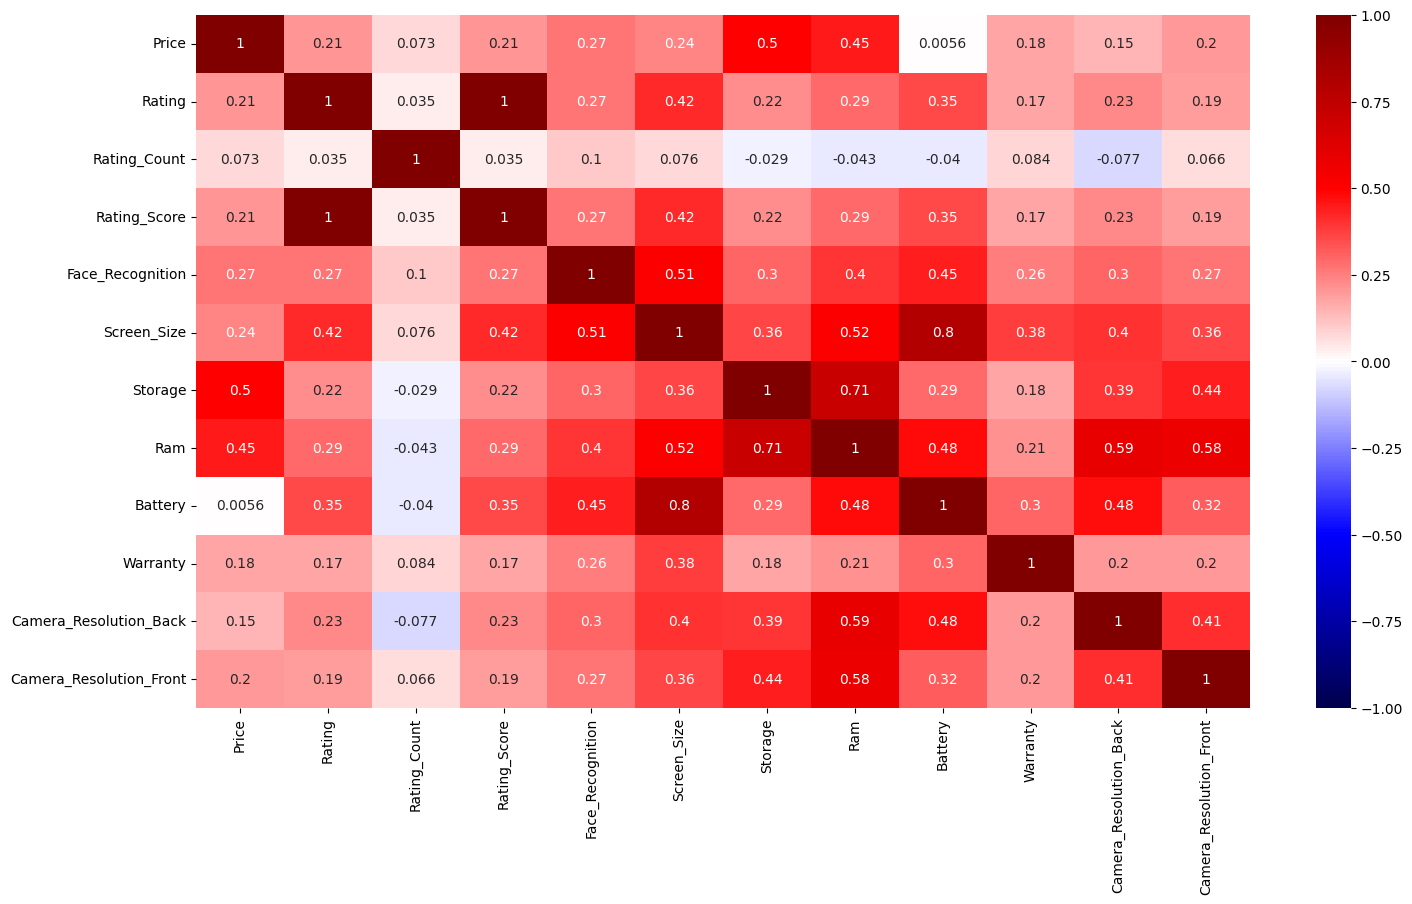

In [170]:
#subset_df_1 = df_1.columns[:]

#Öncelikle korelasyonları inceledik.
plt.figure(figsize=[17,9])
sns.heatmap(df_1.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, annot_kws={"size": 10});
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.show()

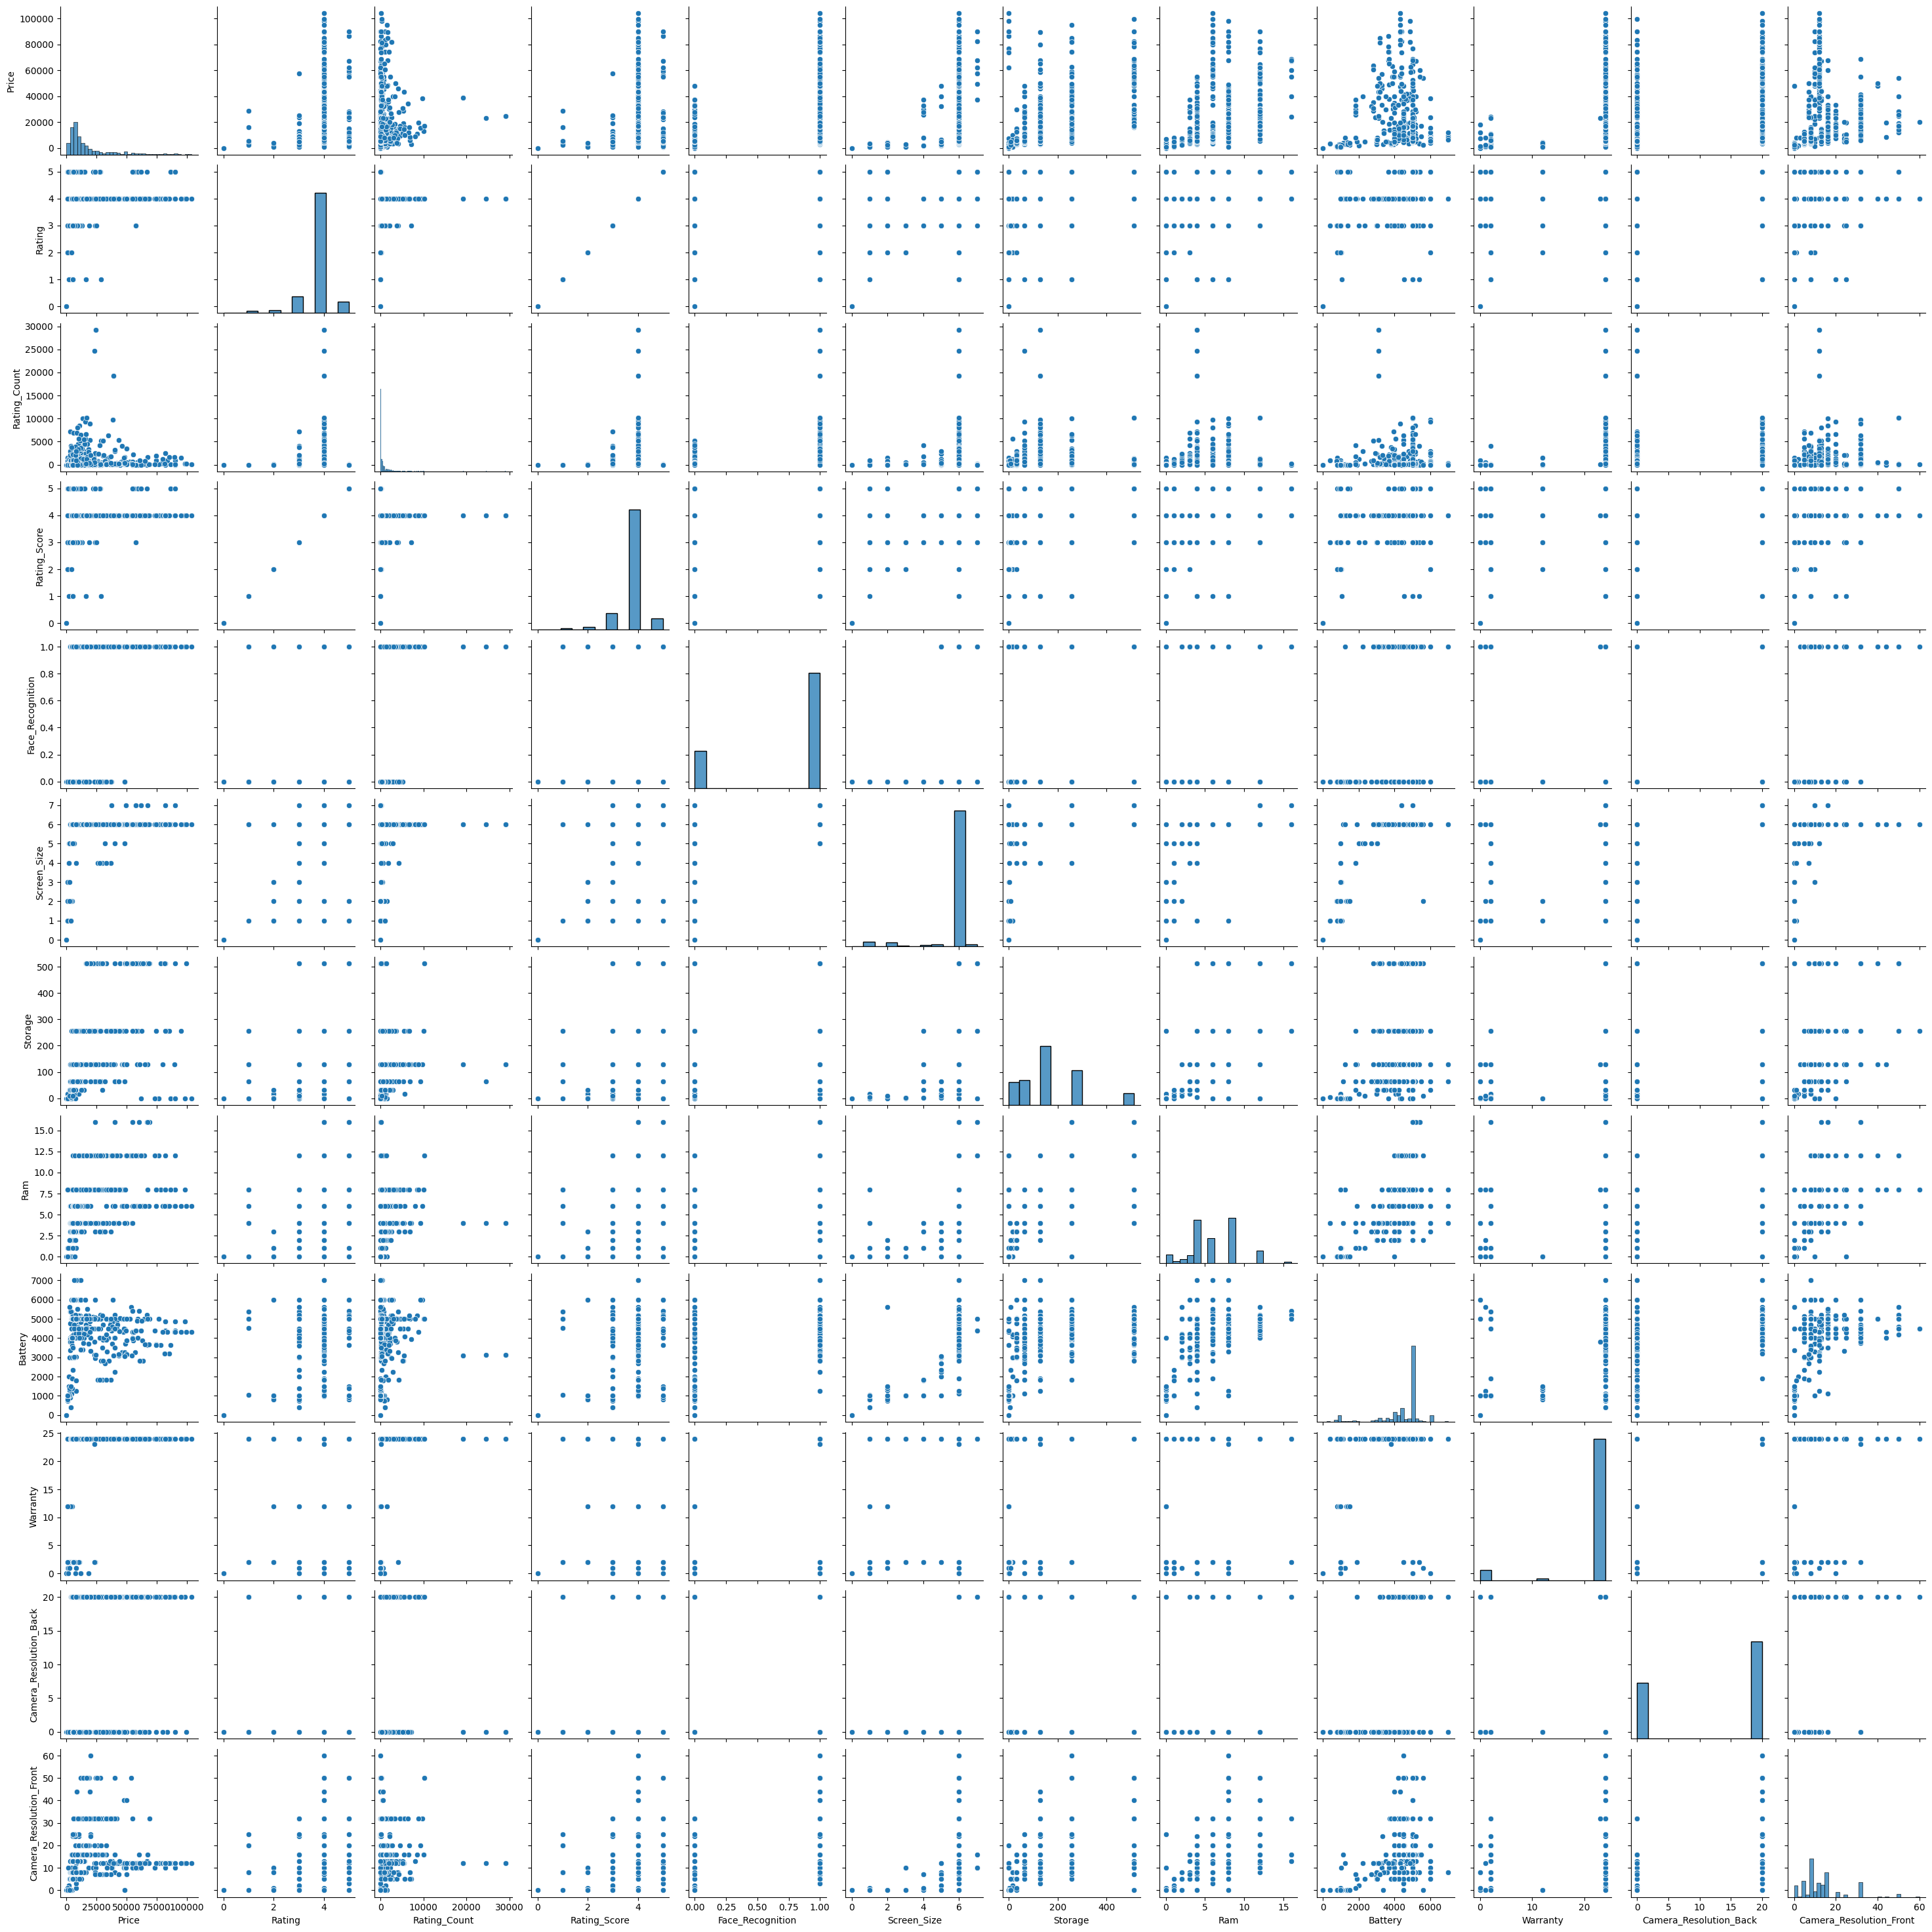

In [171]:
sns.pairplot(df_1);

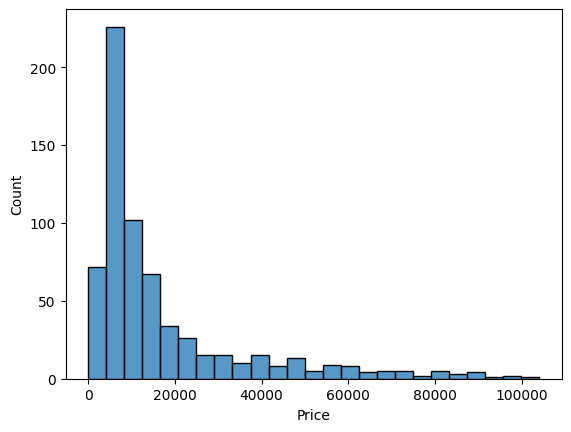

In [172]:
sns.histplot(df_1.Price, bins=25);

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


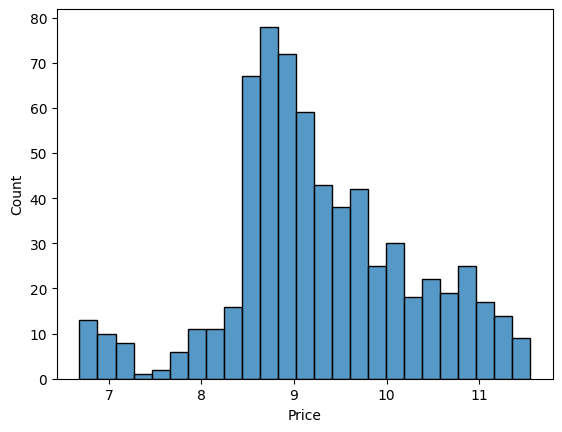

In [173]:
#logaritmik uygulayarak fiyat dağılımında düzelme yakaladık.
sns.histplot(np.log(df_1.Price), bins=25);

In [174]:
#infinite number gözlendiği için verisetine dahil edilmedi.
np.log(df_1.Price)

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0           -inf
1      10.819958
2      10.102297
3      10.563569
4       8.838987
         ...    
936     9.711055
937     9.837241
938     9.694925
939    10.322165
940     9.729015
Name: Price, Length: 657, dtype: float64

In [175]:
df_1.drop(index=0, axis=0)

,Price,Rating,Rating_Count,Rating_Score,Face_Recognition,Screen_Size,Storage,Ram,Battery,Warranty,Camera_Resolution_Back,Camera_Resolution_Front
1,50009,4,3488,4,1,6,128,6,3877,24,20,12
2,24399,4,29192,4,1,6,128,4,3110,24,0,12
3,38699,4,19231,4,1,6,128,4,3095,24,0,12
4,6898,4,816,4,1,6,256,8,5000,24,20,8
5,14000,4,1213,4,1,6,256,8,5000,24,20,16
...,...,...,...,...,...,...,...,...,...,...,...,...
936,16499,4,1244,4,1,6,512,12,5000,24,20,16
937,18718,4,402,4,0,6,256,8,5000,24,0,32
938,16235,4,270,4,0,6,128,8,5000,24,0,32
939,30399,4,5133,4,1,6,128,4,2815,24,0,12


In [176]:
df_1['Price']  = np.log(df_1.Price)

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [177]:
df_1.Price

0           -inf
1      10.819958
2      10.102297
3      10.563569
4       8.838987
         ...    
936     9.711055
937     9.837241
938     9.694925
939    10.322165
940     9.729015
Name: Price, Length: 657, dtype: float64

In [178]:
df_1 = df_1.drop(index=0, axis=0)

In [179]:
df_1.Price

1      10.819958
2      10.102297
3      10.563569
4       8.838987
5       9.546813
         ...    
936     9.711055
937     9.837241
938     9.694925
939    10.322165
940     9.729015
Name: Price, Length: 656, dtype: float64

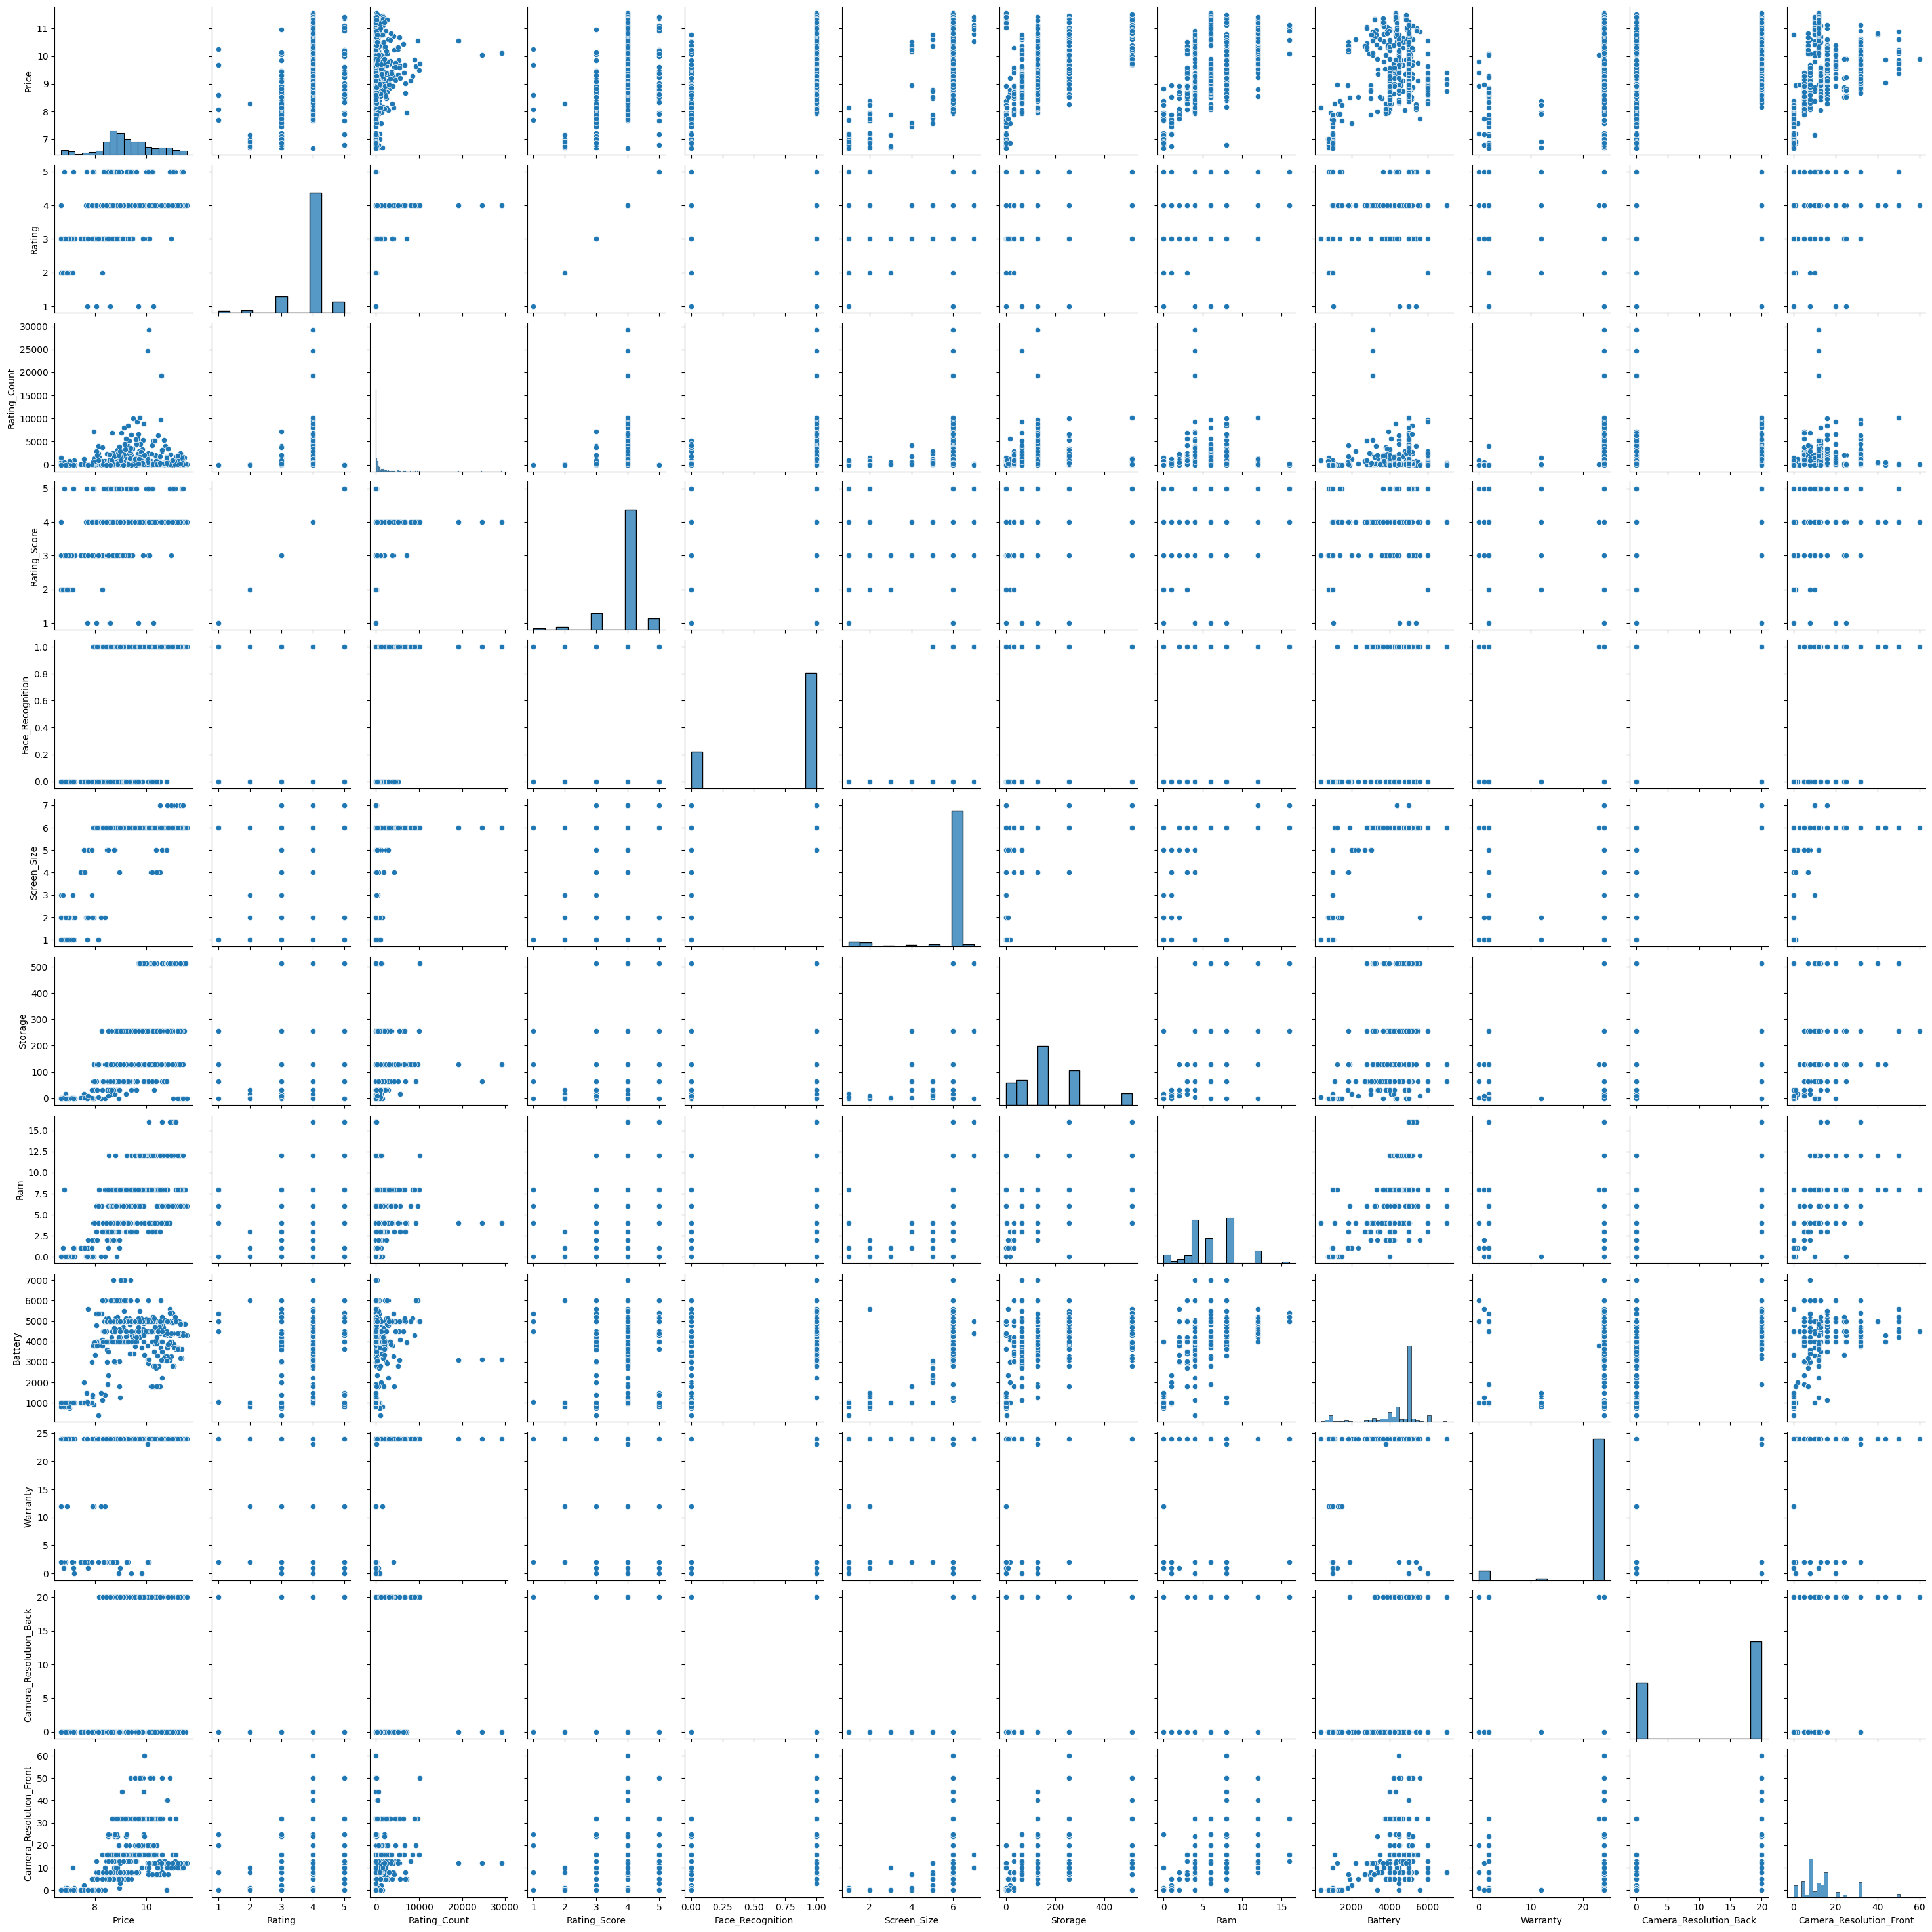

In [180]:
sns.pairplot(df_1);

In [181]:
df_1.columns

Index(['Price', 'Rating', 'Rating_Count', 'Rating_Score', 'Face_Recognition',
       'Screen_Size', 'Storage', 'Ram', 'Battery', 'Warranty',
       'Camera_Resolution_Back', 'Camera_Resolution_Front'],
      dtype='object')

In [182]:
#Test ve Validasyon aşamaları
X = df_1.drop(columns=['Rating_Score', 'Price']) 

y = df_1['Price']

print(X.columns)

# Veri setinin %20'lik kısmını Test aşaması için saklıyoruz
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Index(['Rating', 'Rating_Count', 'Face_Recognition', 'Screen_Size', 'Storage',
       'Ram', 'Battery', 'Warranty', 'Camera_Resolution_Back',
       'Camera_Resolution_Front'],
      dtype='object')


In [183]:
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("x_test:", x_test.shape)
print("y_test", y_test.shape)

X_train: (524, 10)
Y_train: (524,)
x_test: (132, 10)
y_test (132,)


In [184]:
#validation data
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [185]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (393, 10)
y_train: (393,)
x_val: (131, 10)
y_val: (131,)


In [186]:
# Lineer Regresyon
lm = LinearRegression()

# Ridge Regresyon
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_val_scaled = scaler.transform(x_val.values)
x_test_scaled = scaler.transform(x_test.values)

lm_reg = Ridge(alpha=1)

# Polinomal Regresyon
poly = PolynomialFeatures(degree=2) 

x_train_poly = poly.fit_transform(x_train.values)
x_val_poly = poly.transform(x_val.values)
x_test_poly = poly.transform(x_test.values)

lm_poly = LinearRegression()

In [187]:
lm.fit(x_train, y_train)
print(f'Linear Regression R2: {lm.score(x_val, y_val):.3f}')

lm_reg.fit(x_train_scaled, y_train)
print(f'Ridge Regression R2: {lm_reg.score(x_val_scaled, y_val):.3f}')

lm_poly.fit(x_train_poly, y_train)
print(f'Degree 2 Polynomial Regression R2: {lm_poly.score(x_val_poly, y_val):.3f}')

Linear Regression R2: 0.667
Ridge Regression R2: 0.667
Degree 2 Polynomial Regression R2: 0.152


In [188]:
#polinomal regresyon 5 dereceye kadar deneniyor.
sonuc_deger = []
poly_derece = 5

for degree in range(1, poly_derece+1):
    
    poly = PolynomialFeatures(degree=degree)
    
    x_train_poly = poly.fit_transform(x_train.values)
    x_val_poly = poly.transform(x_val.values)
    
    lm_poly = LinearRegression()

    lm_poly.fit(x_train_poly, y_train)

    sonuc_deger.append(lm_poly.score(x_val_poly, y_val))

# Sonuçları inceleme    
for degree, score in enumerate(sonuc_deger):
    print(f"Polynomial Degree: {degree+1}, Validation Score: {score:.3f}")
    
#Poly pek uygun görünmüyor

Polynomial Degree: 1, Validation Score: 0.667
Polynomial Degree: 2, Validation Score: 0.152
Polynomial Degree: 3, Validation Score: -10502575.213
Polynomial Degree: 4, Validation Score: -4562521.953
Polynomial Degree: 5, Validation Score: -4128877686.976


In [189]:
#Validasyon datası ile birleştiriliyor
X_scaled = scaler.fit_transform(X_train.values)
lm_reg.fit(X_scaled, Y_train)
print(f'Ridge Regression Test R2: {lm_reg.score(x_test_scaled, y_test):.3f}')

Ridge Regression Test R2: 0.537


In [190]:
#cross validation
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_cv = cross_val_score(lr, X_train, Y_train, cv=10, scoring='r2')
lr_cv

array([0.543116  , 0.53750301, 0.66143011, 0.59524257, 0.68280376,
       0.79108265, 0.66421354, 0.69638126, 0.71374937, 0.5450458 ])

In [191]:
ridge = Ridge()
X_train_scaled = scaler.fit_transform(X_train.values)

ridge_cv = cross_val_score(ridge, X_train_scaled, Y_train, cv=10, scoring='r2')
ridge_cv

array([0.54537981, 0.53813255, 0.66089192, 0.59421861, 0.68219405,
       0.7911801 , 0.66399486, 0.69649432, 0.71414473, 0.5455862 ])

In [192]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'Cross Validated Score (Mean)': [lr_cv.mean(), ridge_cv.mean()],
    'Cross Validated Score (Std)': [lr_cv.std(), ridge_cv.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Ridge Regression,0.643222,0.080357
Linear Regression,0.643057,0.080709


In [193]:
""" # Değişkenlerin tanımlaması
y, X = patsy.dmatrices('Price ~ Rating + Rating_Count + Rating_Score +Face_Recognition + Screen_Size + Storage + Ram + Battery + Warranty + Camera_Resolution_Back + Camera_Resolution_Front'
                       , data=df_1, return_type="dataframe")

# Modeli Oluşturma
model = sm.OLS(y, X)

# Modeli Eğitme
fit = model.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit.summary() """

' # Değişkenlerin tanımlaması\ny, X = patsy.dmatrices(\'Price ~ Rating + Rating_Count + Rating_Score +Face_Recognition + Screen_Size + Storage + Ram + Battery + Warranty + Camera_Resolution_Back + Camera_Resolution_Front\'\n                       , data=df_1, return_type="dataframe")\n\n# Modeli Oluşturma\nmodel = sm.OLS(y, X)\n\n# Modeli Eğitme\nfit = model.fit()\n\n# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme\nfit.summary() '

In [194]:
#R2 değeri aynı zamanda polinomal

lr2 = LinearRegression()

X = df_1[['Ram', 'Storage']]

y = df_1['Price']

lr2.fit(X, y)

r_squared2 = lr2.score(X, y)
print("R2:", round(r_squared2,1))

adjusted_r_squared2 = 1 - (1-r_squared2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared2,3)) 


R2: 0.5
Adjusted R2: 0.462


In [195]:
lm2 = smf.ols('Price ~ Ram + Storage + Rating + Screen_Size', data=df_1)

fit2 = lm2.fit()

fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     199.0
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          2.17e-111
Time:                        18:58:20   Log-Likelihood:                -668.04
No. Observations:                 656   AIC:                             1346.
Df Residuals:                     651   BIC:                             1369.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.2377      0.190     32.892      0.000       5.865       6.610
Ram             0.0780      0.013      6.002      0.000       0.053       0.104
Storage         0.0024      0.000      8.455      0.000       0.002       0.003
Rating          0.2184      0.048      4.523      0.000       0.124       0.313
Screen_Size     0.2353      0.028      8.382      0.000       0.180       0.290
==============================================================================
Omnibus:                      105.823   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.588
Skew:                           1.083   Prob(JB):                     2.22e-35
Kurtosis:                       4.073   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
lm3 = smf.ols('Price ~ Storage + Rating_Score', data=df_1)

fit3 = lm3.fit()

fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           2.47e-82
Time:                        18:58:20   Log-Likelihood:                -741.27
No. Observations:                 656   AIC:                             1489.
Df Residuals:                     653   BIC:                             1502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.9411      0.194     35.776      0.000       6.560       7.322
Storage          0.0043      0.000     18.614      0.000       0.004       0.005
Rating_Score     0.4233      0.050      8.387      0.000       0.324       0.522
==============================================================================
Omnibus:                       73.708   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.679
Skew:                           0.783   Prob(JB):                     1.53e-24
Kurtosis:                       4.250   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
# LR Modeli
lr1 = LinearRegression()

# Feature setleri
X = df_1.iloc[:, 1:]

# Targetı Oluşturma
y = df_1.iloc[:, 0]

# Modeli Eğitme
lr1.fit(X, y)

# R2 Değeri
r_squared1 = lr1.score(X,y)
print("R2:", round(r_squared1,3))

# Adjusted R2 Değeri
adjusted_r_squared1 = 1 - (1-r_squared1)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared1,3))

R2: 0.643
Adjusted R2: 0.637


In [202]:
df.Brand.value_counts().sum()

657

In [204]:
df.Brand.info()

<class 'pandas.core.series.Series'>
Index: 657 entries, 0 to 940
Series name: Brand
Non-Null Count  Dtype 
--------------  ----- 
657 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [257]:
df['Brand'] = df['Brand'].astype(str)
brand = pd.get_dummies(df.Brand, drop_first=True, columns=['Brand'], prefix='B_')
brand = brand.astype(int)
brand


C:\Users\OMN\AppData\Local\Temp\ipykernel_44572\3485017932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand'] = df['Brand'].astype(str)


,B__Apple,B__Bade Shopping,B__Brand,B__Casper,B__Digiphone,B__Dijitsu,B__Dodge,B__Elephone,B__General Mobile,B__HCS,...,B__Tecno,B__Trident,B__Ulefone,B__Vestel,B__WT,B__Welio,B__Wiko,B__Xiaomi,B__ZTE,B__vivo
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
939,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
df_2 = df.join(brand)

In [270]:
df_2.head()

,Price,Brand,Rating,Rating_Count,Rating_Score,Face_Recognition,Screen_Size,Storage,Ram,Battery,...,B__Tecno,B__Trident,B__Ulefone,B__Vestel,B__WT,B__Welio,B__Wiko,B__Xiaomi,B__ZTE,B__vivo
0,0,Brand,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50009,Apple,4,3488,4,1,6,128,6,3877,...,0,0,0,0,0,0,0,0,0,0
2,24399,Apple,4,29192,4,1,6,128,4,3110,...,0,0,0,0,0,0,0,0,0,0
3,38699,Apple,4,19231,4,1,6,128,4,3095,...,0,0,0,0,0,0,0,0,0,0
4,6898,POCO,4,816,4,1,6,256,8,5000,...,0,0,0,0,0,0,0,0,0,0


In [273]:
df_2 = df_2.drop(columns=['Brand'])
df_2

,Price,Rating,Rating_Count,Rating_Score,Face_Recognition,Screen_Size,Storage,Ram,Battery,Warranty,...,B__Tecno,B__Trident,B__Ulefone,B__Vestel,B__WT,B__Welio,B__Wiko,B__Xiaomi,B__ZTE,B__vivo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50009,4,3488,4,1,6,128,6,3877,24,...,0,0,0,0,0,0,0,0,0,0
2,24399,4,29192,4,1,6,128,4,3110,24,...,0,0,0,0,0,0,0,0,0,0
3,38699,4,19231,4,1,6,128,4,3095,24,...,0,0,0,0,0,0,0,0,0,0
4,6898,4,816,4,1,6,256,8,5000,24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,16499,4,1244,4,1,6,512,12,5000,24,...,0,0,0,0,0,0,0,1,0,0
937,18718,4,402,4,0,6,256,8,5000,24,...,0,0,0,0,0,0,0,0,0,0
938,16235,4,270,4,0,6,128,8,5000,24,...,0,0,0,0,0,0,0,0,0,0
939,30399,4,5133,4,1,6,128,4,2815,24,...,0,0,0,0,0,0,0,0,0,0


In [274]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 940
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Price                    657 non-null    int32
 1   Rating                   657 non-null    int32
 2   Rating_Count             657 non-null    int32
 3   Rating_Score             657 non-null    int32
 4   Face_Recognition         657 non-null    int64
 5   Screen_Size              657 non-null    int32
 6   Storage                  657 non-null    int32
 7   Ram                      657 non-null    int32
 8   Battery                  657 non-null    int32
 9   Warranty                 657 non-null    int32
 10  Camera_Resolution_Back   657 non-null    int32
 11  Camera_Resolution_Front  657 non-null    int32
 12  B__Apple                 657 non-null    int32
 13  B__Bade Shopping         657 non-null    int32
 14  B__Brand                 657 non-null    int32
 15  B__Casper  

In [275]:
df_2.head()

,Price,Rating,Rating_Count,Rating_Score,Face_Recognition,Screen_Size,Storage,Ram,Battery,Warranty,...,B__Tecno,B__Trident,B__Ulefone,B__Vestel,B__WT,B__Welio,B__Wiko,B__Xiaomi,B__ZTE,B__vivo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50009,4,3488,4,1,6,128,6,3877,24,...,0,0,0,0,0,0,0,0,0,0
2,24399,4,29192,4,1,6,128,4,3110,24,...,0,0,0,0,0,0,0,0,0,0
3,38699,4,19231,4,1,6,128,4,3095,24,...,0,0,0,0,0,0,0,0,0,0
4,6898,4,816,4,1,6,256,8,5000,24,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_2.value_counts

<bound method DataFrame.value_counts of      Price     Brand  Rating  Rating_Count  Rating_Score  Face_Recognition  \
0        0     Brand       0             0             0                 0   
1    50009    Apple        4          3488             4                 1   
2    24399    Apple        4         29192             4                 1   
3    38699    Apple        4         19231             4                 1   
4     6898     POCO        4           816             4                 1   
..     ...       ...     ...           ...           ...               ...   
936  16499   Xiaomi        4          1244             4                 1   
937  18718  Samsung        4           402             4                 0   
938  16235  Samsung        4           270             4                 0   
939  30399    Apple        4          5133             4                 1   
940  16798    HONOR        4         10217             4                 1   

     Screen_Size  Stora

In [276]:
df_2.select_dtypes(include='object')

""
0
1
2
3
4
...
936
937
938
939


In [277]:
df_2.columns

Index(['Price', 'Rating', 'Rating_Count', 'Rating_Score', 'Face_Recognition',
       'Screen_Size', 'Storage', 'Ram', 'Battery', 'Warranty',
       'Camera_Resolution_Back', 'Camera_Resolution_Front', 'B__Apple ',
       'B__Bade Shopping ', 'B__Brand', 'B__Casper ', 'B__Digiphone ',
       'B__Dijitsu ', 'B__Dodge ', 'B__Elephone ', 'B__General Mobile ',
       'B__HCS ', 'B__HONOR ', 'B__Hiking ', 'B__Huawei ', 'B__Infinix ',
       'B__Itel ', 'B__Ixperia ', 'B__LG ', 'B__MEGA ', 'B__Nokia ',
       'B__Nothing ', 'B__Omix ', 'B__Oneplus ', 'B__Oppo ', 'B__Oukitel ',
       'B__POCO ', 'B__Panasonic ', 'B__Philips ', 'B__Realme ', 'B__Reeder ',
       'B__Samsung ', 'B__TCL ', 'B__Tecno ', 'B__Trident ', 'B__Ulefone ',
       'B__Vestel ', 'B__WT ', 'B__Welio ', 'B__Wiko ', 'B__Xiaomi ',
       'B__ZTE ', 'B__vivo '],
      dtype='object')

In [278]:
df_2.dropna(inplace=True)
df_2

,Price,Rating,Rating_Count,Rating_Score,Face_Recognition,Screen_Size,Storage,Ram,Battery,Warranty,...,B__Tecno,B__Trident,B__Ulefone,B__Vestel,B__WT,B__Welio,B__Wiko,B__Xiaomi,B__ZTE,B__vivo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50009,4,3488,4,1,6,128,6,3877,24,...,0,0,0,0,0,0,0,0,0,0
2,24399,4,29192,4,1,6,128,4,3110,24,...,0,0,0,0,0,0,0,0,0,0
3,38699,4,19231,4,1,6,128,4,3095,24,...,0,0,0,0,0,0,0,0,0,0
4,6898,4,816,4,1,6,256,8,5000,24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,16499,4,1244,4,1,6,512,12,5000,24,...,0,0,0,0,0,0,0,1,0,0
937,18718,4,402,4,0,6,256,8,5000,24,...,0,0,0,0,0,0,0,0,0,0
938,16235,4,270,4,0,6,128,8,5000,24,...,0,0,0,0,0,0,0,0,0,0
939,30399,4,5133,4,1,6,128,4,2815,24,...,0,0,0,0,0,0,0,0,0,0


In [279]:
print(df_2.dtypes.iloc[1:30])

Rating                     int32
Rating_Count               int32
Rating_Score               int32
Face_Recognition           int64
Screen_Size                int32
Storage                    int32
Ram                        int32
Battery                    int32
Warranty                   int32
Camera_Resolution_Back     int32
Camera_Resolution_Front    int32
B__Apple                   int32
B__Bade Shopping           int32
B__Brand                   int32
B__Casper                  int32
B__Digiphone               int32
B__Dijitsu                 int32
B__Dodge                   int32
B__Elephone                int32
B__General Mobile          int32
B__HCS                     int32
B__HONOR                   int32
B__Hiking                  int32
B__Huawei                  int32
B__Infinix                 int32
B__Itel                    int32
B__Ixperia                 int32
B__LG                      int32
B__MEGA                    int32
dtype: object


In [280]:
lr_1 = LinearRegression()

X = df_2.drop(columns=['Price'])

y = df_2['Price']

lr_1.fit(X, y)

r_squared2_1 = lr_1.score(X, y)
print("R2:", round(r_squared2_1,1))

adjusted_r_squared2_1 = 1 - (1-r_squared2_1)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared2_1,3)) 

R2: 0.8
Adjusted R2: 0.761


In [281]:
y = df_2.Price
x = df_2.drop(columns=['Price'])
x = sm.add_constant(x)

lsm_1 = sm.OLS(y,x)
fit_1 = lsm_1.fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     42.10
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          1.22e-165
Time:                        19:39:45   Log-Likelihood:                -6919.7
No. Observations:                 657   AIC:                         1.394e+04
Df Residuals:                     605   BIC:                         1.418e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.124e+04   4753.732     -2.365      0.018   -2.06e+04   -1904.429
Rating                    471.0790    388.482      1.213      0.226    -291.859    1234.017
Rating_Count               -1.0784      0.158     -6.823      0.000      -1.389      -0.768
Rating_Score              471.0791    388.482      1.213      0.226    -291.859    1234.017
Face_Recognition         3431.5117   1087.160      3.156      0.002    1296.446    5566.577
Screen_Size              1738.6085    830.178      2.094      0.037     108.229    3368.988
Storage                    11.3571      4.424      2.567      0.010       2.670      20.045
Ram                      2835.8041    223.407     12.693      0.000    2397.057    3274.551
Battery                    -0.5397      0.677     -0.797      0.426      -1.870       0.790
Warranty                   56.0953     78.393      0.716      0.475     -97.861     210.051
Camera_Resolution_Back     -8.8388     52.828     -0.167      0.867    -112.587      94.909
Camera_Resolution_Front  -128.1322     47.983     -2.670      0.008    -222.366     -33.898
B__Apple                  3.88e+04   3839.054     10.106      0.000    3.13e+04    4.63e+04
B__Bade Shopping         3734.7571   1.04e+04      0.360      0.719   -1.66e+04    2.41e+04
B__Brand                 1.124e+04   1.06e+04      1.062      0.289   -9547.206     3.2e+04
B__Casper               -1.253e+04   4321.972     -2.899      0.004    -2.1e+04   -4040.646
B__Digiphone             4659.8302   1.02e+04      0.457      0.648   -1.54e+04    2.47e+04
B__Dijitsu              -1.069e+04   1.04e+04     -1.031      0.303   -3.11e+04    9683.690
B__Dodge                 7699.2903   7721.357      0.997      0.319   -7464.627    2.29e+04
B__Elephone             -7880.4367   1.02e+04     -0.773      0.440   -2.79e+04    1.21e+04
B__General Mobile       -1.209e+04   4390.545     -2.753      0.006   -2.07e+04   -3463.728
B__HCS                   4412.6292   1.08e+04      0.410      0.682   -1.67e+04    2.56e+04
B__HONOR                 -204.4914   5707.801     -0.036      0.971   -1.14e+04     1.1e+04
B__Hiking               -6978.7765   4375.554     -1.595      0.111   -1.56e+04    1614.342
B__Huawei                -178.6237   3992.615     -0.045      0.964   -8019.692    7662.445
B__Infinix              -1.271e+04   4141.133     -3.070      0.002   -2.08e+04   -4579.699
B__Itel                 -2.263e+04   1.02e+04     -2.219      0.027   -4.27e+04   -2600.510
B__Ixperia               6960.6241   1.03e+04      0.677      0.498   -1.32e+04    2.71e+04
B__LG                    5483.2339   1.01e+04      0.543      0.587   -1.43e+04    2.53e+04
B__MEGA                  8510.9479   1.02e+04      0.833      0.405   -1.16e+04    2.86e+04
B__Nokia                 7088.4488   4958.837  

In [287]:
def split_and_test(X, y):
    '''
    Bu uygulamada sadece Lineer Regresyon algoritmasıyla
    çalışacağımız için Validation aşamasına ihtiyacımız yok
    '''
    
    # Veri Setini Train/Test Olarak Bölme
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Eğitim Veri Setiyle Lineer Regresyon Modeli Oluşturma
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Test Veri Setiyle Model Skorunu Elde Etme
    test_score = lr_model.score(X_test, y_test)
    
    # Sonuçları Görüntüleme
    print('Test R2 Score:', round(test_score,3))

In [288]:
split_and_test(X,y)

Test R2 Score: -9.927561188879264e+16


In [282]:
# lr2 modelinden elde edilen katsayı değerleri
#print("Coefficents:", lr2.coef_)

# lr2 modelinden elde edilen sabit değer
#print("Intercept:", lr2.intercept_)

In [283]:
#df.to_pickle('Desktop/mobile_phones.pkl') eğitilen modeli pickle olarak kaydetmek

In [284]:
""" from joblib import dump, load

dump(lr2, 'data/survey_sk_model.pkl') """

" from joblib import dump, load\n\ndump(lr2, 'data/survey_sk_model.pkl') "

In [285]:
""" model = load('data/survey_sk_model.pkl')
model """

" model = load('data/survey_sk_model.pkl')\nmodel "